In [0]:
#CSC 84020 
#Homework # 3
#Group Members: Avinash Jairam & Subhadarshi Panda
#Problem # 1

import os, shutil
import numpy as np
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image



In [12]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
# kaggle credentials
kaggle_username = "mike2j2"
kaggle_key = "b031ff463fa998c105aa2d8fb3d630cf"
os.environ['KAGGLE_USERNAME'] = kaggle_username
os.environ['KAGGLE_KEY'] = kaggle_key

# create kaggle.json file
!echo "{"username":"mike2j2","key":"b031ff463fa998c105aa2d8fb3d630cf"}" > /root/.kaggle/kaggle.json

/bin/bash: /root/.kaggle/kaggle.json: No such file or directory


In [14]:
!kaggle competitions download -c dogs-vs-cats -p gdrive/My\ Drive/Colab\ Notebooks

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
!ls gdrive/My\ Drive/Colab\ Notebooks

'HW #3 PAPER - Part 1.gdoc'	 sampleSubmission.csv   Untitled0.ipynb
'HW 3- Problem 1 Part a.ipynb'	 test1.zip	        Untitled1.ipynb
'HW 3- Problem 1 Part b.ipynb'	 train.zip


In [0]:
import zipfile


# data directory
data_dir = "gdrive/My Drive/Colab Notebooks/"
zipped_filename = 'train.zip'
with zipfile.ZipFile(os.path.join(data_dir, zipped_filename), 'r') as zip_ref:
    zip_ref.extractall(data_dir)

In [0]:
original_dataset_dir = 'gdrive/My Drive/Colab Notebooks/train'
base_dir = 'gdrive/My Drive/Colab Notebooks/cats_and_dogs_small'
os.mkdir(base_dir)


In [18]:
!ls gdrive/My\ Drive/Colab\ Notebooks

 cats_and_dogs_small		 sampleSubmission.csv   Untitled0.ipynb
'HW #3 PAPER - Part 1.gdoc'	 test1.zip	        Untitled1.ipynb
'HW 3- Problem 1 Part a.ipynb'	 train
'HW 3- Problem 1 Part b.ipynb'	 train.zip


In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [0]:
# training: 1000 cats, 1000 dogs
# val: 500 cats, 500 dogs
# test: 500 cats, 500 dogs

# total: 2000 cats, 2000 dogs

all_filenames = os.listdir(original_dataset_dir)
all_cat_filenames, all_dog_filenames = [], []
for filename in all_filenames:
  if filename.split('.')[0] == 'cat':
    all_cat_filenames.append(filename)
  else:
    all_dog_filenames.append(filename)

In [0]:
# shuffle
np.random.shuffle(all_cat_filenames)
np.random.shuffle(all_dog_filenames)

all_cat_filenames_2000 = all_cat_filenames[:2000]
all_dog_filenames_2000 = all_dog_filenames[:2000]

# create train, val, test splits
train_cats = all_cat_filenames_2000[:1000]
train_dogs = all_dog_filenames_2000[:1000]
#train_dir = train_cats + train_dogs 

val_cats = all_cat_filenames_2000[1000:1500]
val_dogs = all_dog_filenames_2000[1000:1500]
#validation_dir = val_cats + val_dogs

test_cats = all_cat_filenames_2000[1500:2000]
test_dogs = all_dog_filenames_2000[1500:2000]
#test_dir = test_cats + test_dogs


def copyImages(bigList,destination):
  for fname in bigList:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(destination, fname)
    shutil.copyfile(src, dst)

copyImages(train_cats,train_cats_dir)


In [0]:
copyImages(train_dogs,train_dogs_dir)
copyImages(val_cats, validation_cats_dir)
copyImages(val_dogs,validation_dogs_dir)
copyImages(test_cats,test_cats_dir)
copyImages(test_dogs,test_dogs_dir)


In [24]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [25]:
model = models.Sequential()

#Saving the model
model.save('cats_and_dogs_small_1.h5')


NotImplementedError: ignored

In [26]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
metrics=['acc'])




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)   

In [0]:
#Configuring the model for training
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
metrics=['acc'])

In [28]:
#Using ImageDataGenerator to read images from directories
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
#Fitting the model using a batch generator
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)




Epoch 1/30





100/100 [==============================] - 19s 185ms/step - loss: 0.6889 - acc: 0.5315 - val_loss: 0.6783 - val_acc: 0.5060
Epoch 2/30
100/100 [==============================] - 11s 106ms/step - loss: 0.6549 - acc: 0.6075 - val_loss: 0.6318 - val_acc: 0.6450
Epoch 3/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5837 - acc: 0.6850 - val_loss: 0.6957 - val_acc: 0.5950
Epoch 4/30
100/100 [==============================] - 11s 105ms/step - loss: 0.5637 - acc: 0.7040 - val_loss: 0.5945 - val_acc: 0.6730
Epoch 5/30
100/100 [==============================] - 11s 107ms/step - loss: 0.5287 - acc: 0.7375 - val_loss: 0.5569 - val_acc: 0.7310
Epoch 6/30
100/100 [==============================] - 11s 108ms/step - loss: 0.4946 - acc: 0.7580 - val_loss: 0.5433 - val_acc: 0.7210
Epoch 7/30
100/100 [==============================] - 11s 107ms/step - loss: 0.4546 - acc: 0.7865 - val_loss: 0.5537 - val_acc: 0.7250
Epoch 8/30
100/100 [===========================

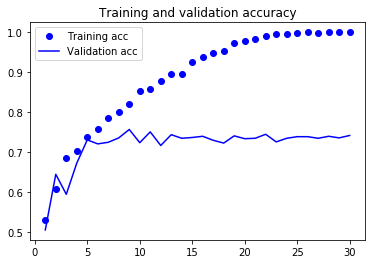

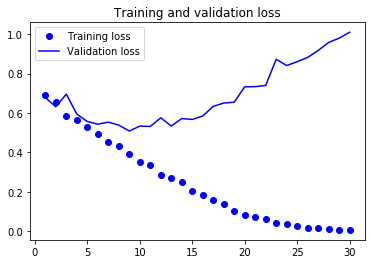

In [30]:
#Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#Setting up a data augmentation configuration via ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2, shear_range=0.2,
zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

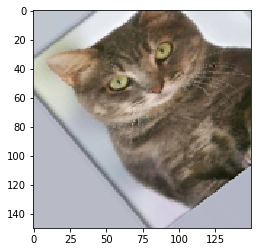

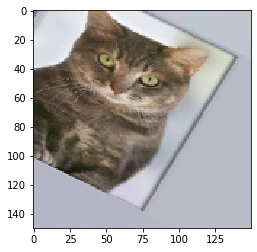

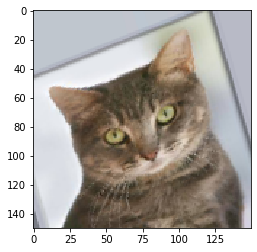

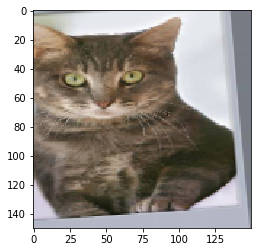

In [32]:
#Displaying some randomly augmented training images
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
    
plt.show()

In [0]:
#Saving the model
model.save('cats_and_dogs_small_2.h5')


In [0]:
#Defining a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [36]:
 #Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
 
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),batch_size=32, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator,validation_steps=50)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 32s 322ms/step - loss: 0.6919 - acc: 0.5144 - val_loss: 0.6769 - val_acc: 0.5235
Epoch 2/100
100/100 [==============================] - 29s 292ms/step - loss: 0.6774 - acc: 0.5691 - val_loss: 0.6506 - val_acc: 0.6082
Epoch 3/100
100/100 [==============================] - 29s 289ms/step - loss: 0.6590 - acc: 0.6038 - val_loss: 0.6349 - val_acc: 0.6358
Epoch 4/100
100/100 [==============================] - 29s 293ms/step - loss: 0.6504 - acc: 0.6078 - val_loss: 0.6228 - val_acc: 0.6411
Epoch 5/100
100/100 [==============================] - 29s 285ms/step - loss: 0.6371 - acc: 0.6250 - val_loss: 0.6405 - val_acc: 0.6117
Epoch 6/100
100/100 [==============================] - 31s 312ms/step - loss: 0.6150 - acc: 0.6487 - val_loss: 0.6035 - val_acc: 0.6836
Epoch 7/100
100/100 [==============================] - 28s 281ms/step - loss: 0.6163 - acc: 0.6491 -

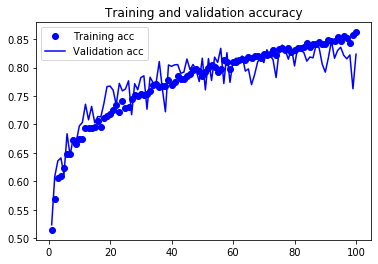

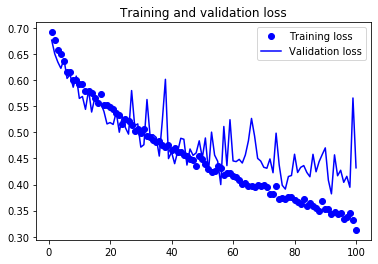

In [37]:
#Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
#Preprocessing a single image
img_path = 'gdrive/My Drive/Colab Notebooks/cats_and_dogs_small/test/cats/cat.10006.jpg'
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
#<1> Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


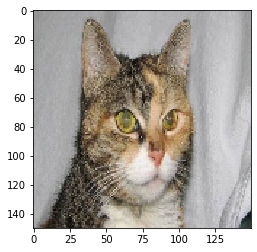

In [41]:
#Displaying the test picture
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [0]:
# Instantiating a model from an input tensor and a list of output tensors
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

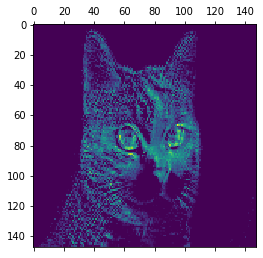

In [47]:
#Visualizing the fourth channel
import matplotlib.pyplot as plt
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

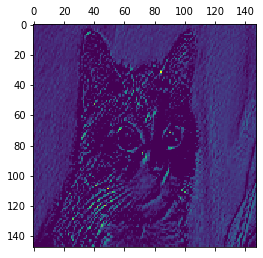

In [48]:
#Visualizing the seventh channel
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


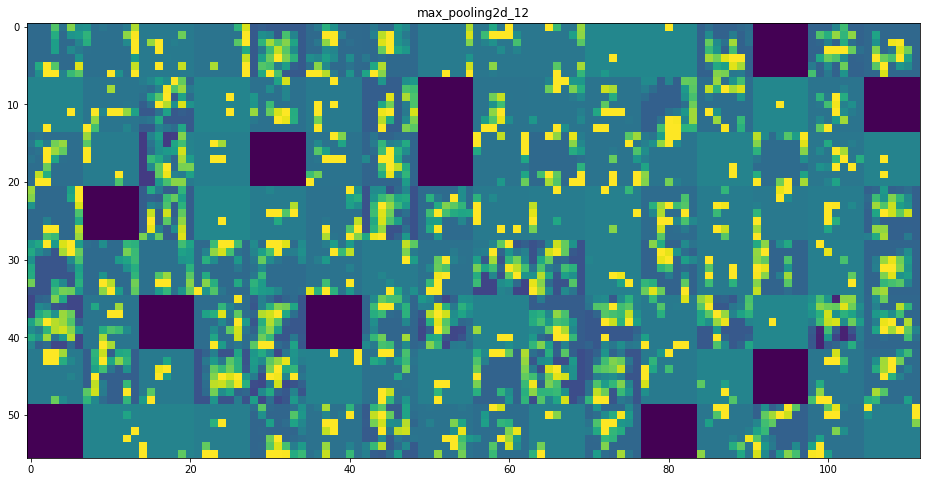

In [49]:
# Visualizing every channel in every intermediate activation
layer_names = []

for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]

  size = layer_activation.shape[1]
  
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,:, :, col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [50]:
# Defining the loss tensor for filter visualization
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
#Obtaining the gradient of the loss with regard to the input
grads = K.gradients(loss, model.input)[0]

In [0]:
# Gradient-normalization trick
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)


In [0]:
#Fetching Numpy output values given Numpy input values
iterate = K.function([model.input], [loss, grads])
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [0]:
# Loss maximization via stochastic gradient descent
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
  loss_value, grads_value = iterate([input_img_data])
  
  input_img_data += grads_value * step

In [0]:
 #Utility function to convert a tensor into a valid image
def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  x += 0.5
  x = np.clip(x, 0, 1)
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [0]:
#Function to generate filter visualizations
def generate_pattern(layer_name, filter_index, size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])
  
  grads = K.gradients(loss, model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
  
  iterate = K.function([model.input], [loss, grads])
  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

  step = 1.
  for i in range(40):
    loss_value,grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

  img = input_img_data[0]
  return deprocess_image(img)

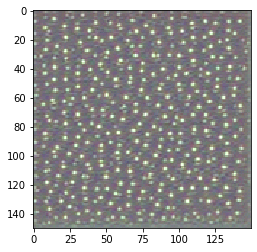

In [60]:
 plt.imshow(generate_pattern('block3_conv1', 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


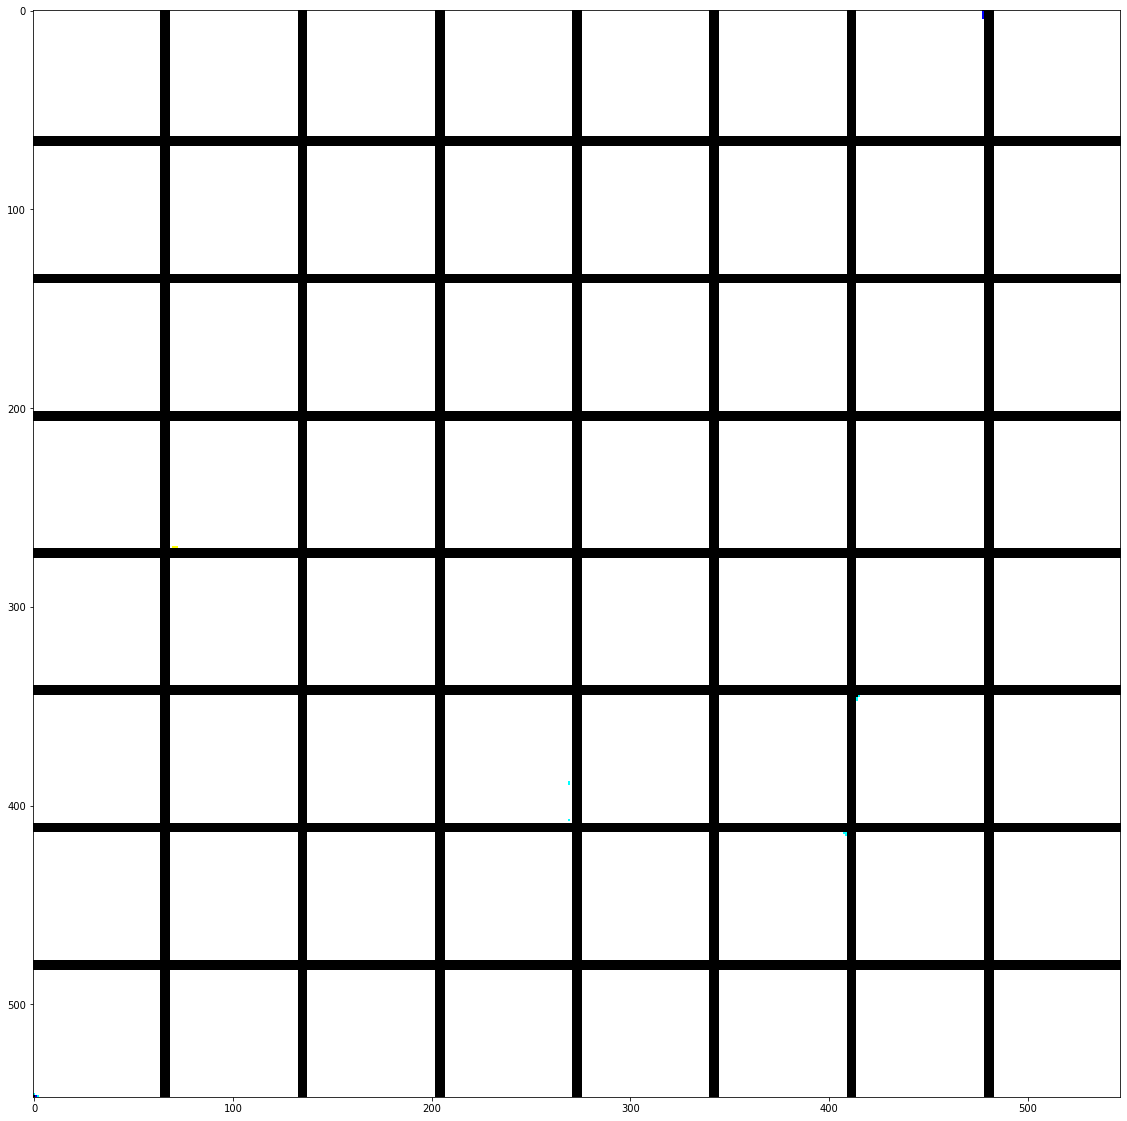

In [61]:
#  Generating a grid of all filter response patterns in a layer
layer_name = 'block1_conv1'
size = 64
margin = 5

results = np.zeros((8 * size+7* margin, 8 * size+7* margin, 3))

for i in range(8):
  for j in range(8):
    filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
    horizontal_start = i * size + i * margin
    horizontal_end = horizontal_start + size
    vertical_start = j * size + j * margin
    vertical_end = vertical_start + size
    results[horizontal_start: horizontal_end,
    vertical_start: vertical_end, :] = filter_img

plt.figure(figsize=(20, 20))
plt.imshow(results)